In [18]:
import numpy as np
import librosa
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt

audio_path = 'Original_voice.mp3' 
audio_resampled_path= 'rs_voice.wav'
noisy_audio_path = 'noisy_voice.wav' 
cleaned_audio_path_chebyshev = 'cleaned_voice_chebyshev.wav'  
cleaned_audio_path_butterworth = 'cleaned_voice_butterworth.wav'

In [2]:
def add_noise(audio, noise_factor=0.05):
    noise = np.random.randn(len(audio))
    augmented_data = audio + noise_factor * noise
    augmented_data = augmented_data.astype(type(audio[0]))
    return augmented_data

def apply_chebyshev_filter(audio, sr, low_cutoff=100, high_cutoff=1100, order=2, ripple=0.4):
    nyquist = 0.5 * sr
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = signal.cheby1(order, ripple, [low, high], btype='band')
    filtered_audio = signal.filtfilt(b, a, audio)
    return filtered_audio

def calculate_snr(clean, noisy):
    noise = noisy - clean
    snr = 10 * np.log10(np.sum(clean ** 2) / np.sum(noise ** 2))
    return snr

def apply_butterworth_filter(audio, sr, low_cutoff=100, high_cutoff=1100, order=2):
    nyquist = 0.5 * sr
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_audio = signal.filtfilt(b, a, audio)
    return filtered_audio


In [3]:
y, sr = librosa.load(audio_path, sr=None)

print(f"Original Sampling rate: {sr} Hz")
new_sr = 120000
audio_resampled = librosa.resample(y, orig_sr=sr, target_sr=new_sr)
print(f"New Sampling rate: {new_sr} Hz")
sf.write(audio_resampled_path, audio_resampled, new_sr)

Original Sampling rate: 44100 Hz
New Sampling rate: 120000 Hz


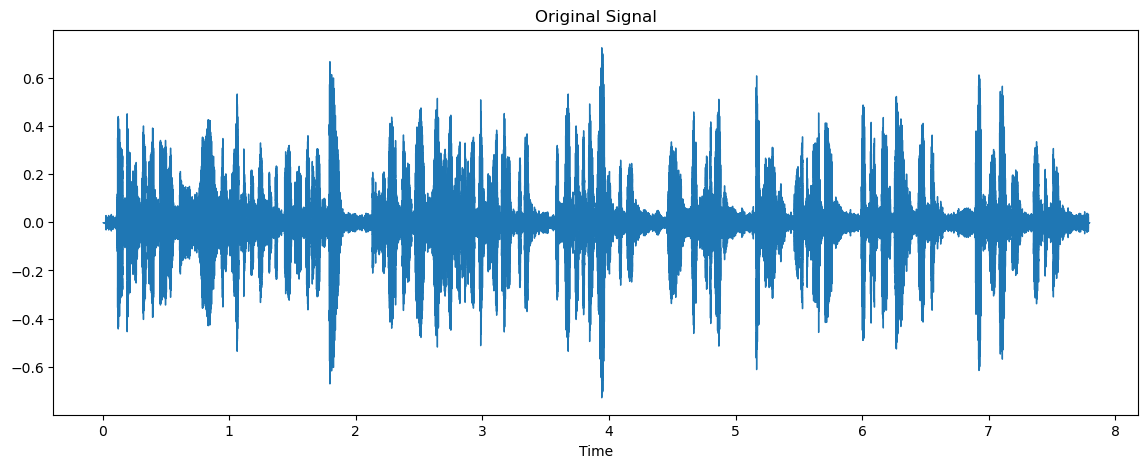

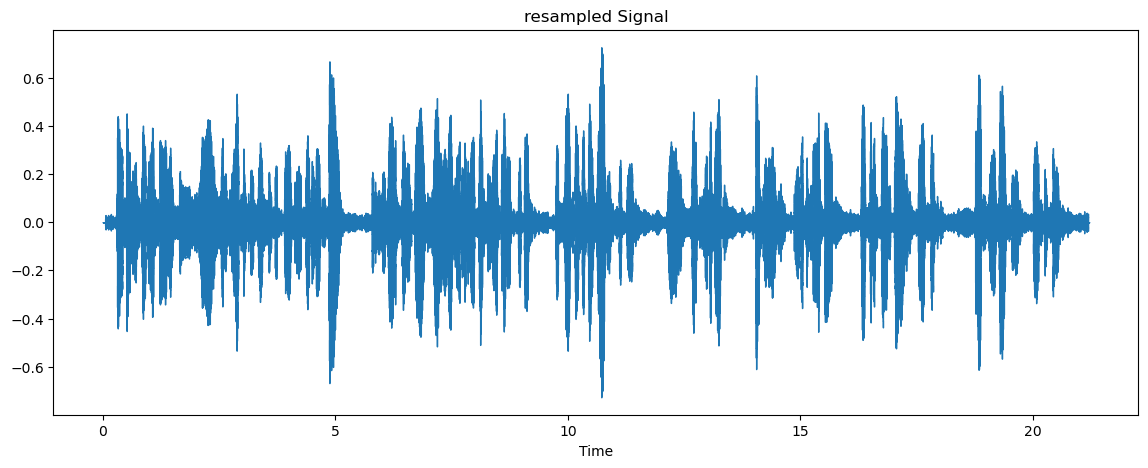

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=new_sr)
plt.title('Original Signal')
plt.show()

plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_resampled, sr=new_sr)
plt.title('resampled Signal')
plt.show()

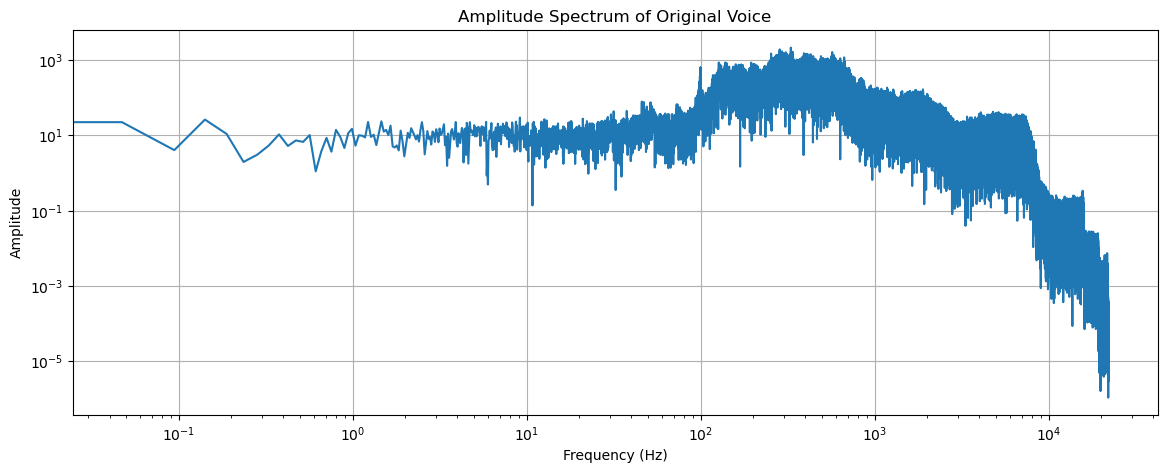

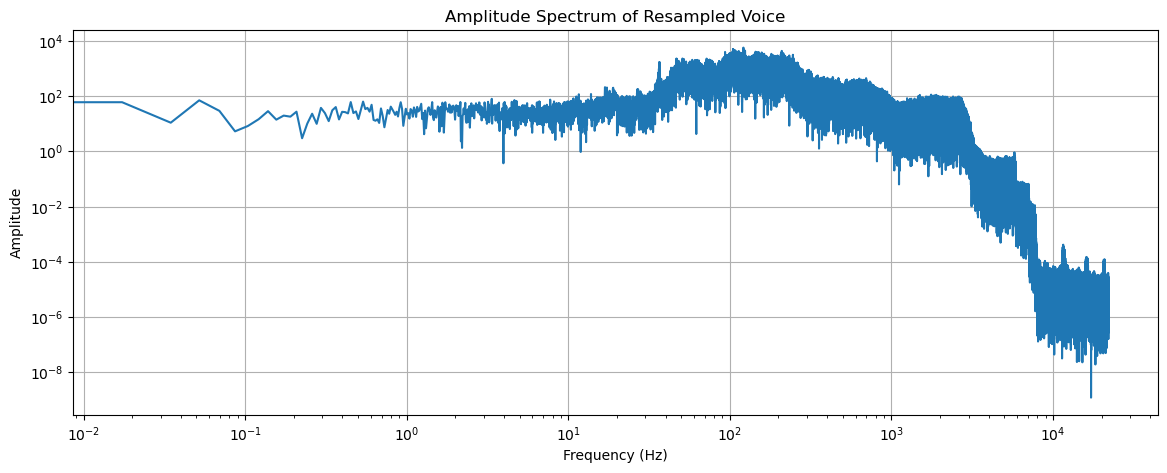

In [5]:
fft_result = np.fft.fft(y)
fft_magnitude = np.abs(fft_result)
fft_frequency = np.fft.fftfreq(len(fft_result), 1/sr)

positive_freq_indices = np.where(fft_frequency >= 0)
fft_frequency = fft_frequency[positive_freq_indices]
fft_magnitude = fft_magnitude[positive_freq_indices]

plt.figure(figsize=(14, 5))
plt.plot(fft_frequency, fft_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of Original Voice')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


fft_result = np.fft.fft(audio_resampled)
fft_magnitude = np.abs(fft_result)
fft_frequency = np.fft.fftfreq(len(fft_result), 1/sr)

positive_freq_indices = np.where(fft_frequency >= 0)
fft_frequency = fft_frequency[positive_freq_indices]
fft_magnitude = fft_magnitude[positive_freq_indices]

plt.figure(figsize=(14, 5))
plt.plot(fft_frequency, fft_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of Resampled Voice')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [6]:
noisy_audio = add_noise(audio_resampled)
sf.write(noisy_audio_path, noisy_audio, new_sr)

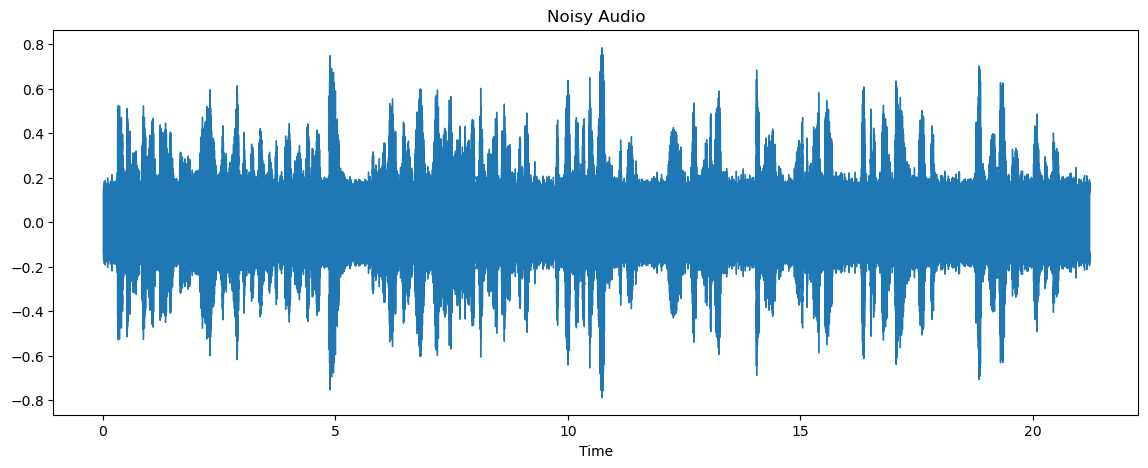

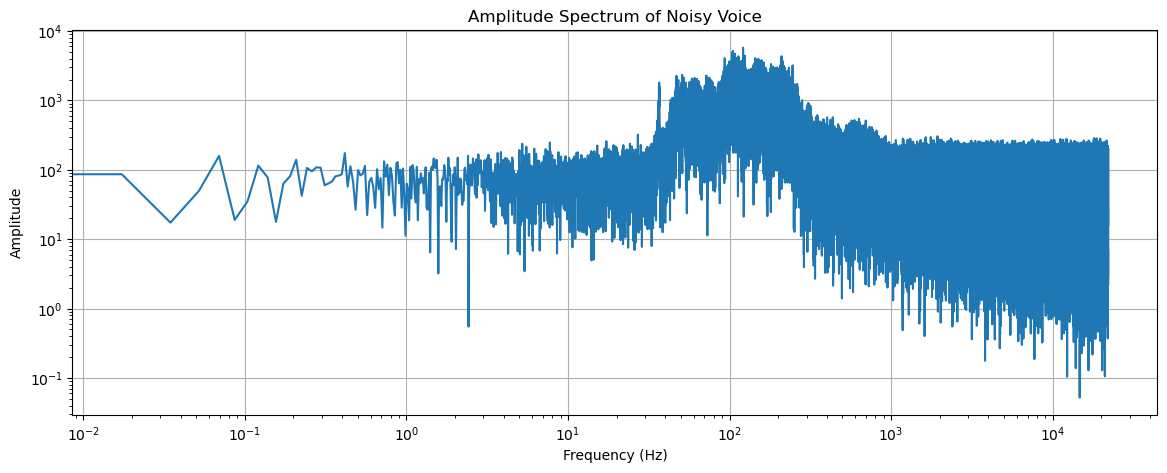

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(noisy_audio, sr=new_sr)
plt.title('Noisy Audio')
plt.show()

fft_result = np.fft.fft(noisy_audio)
fft_magnitude = np.abs(fft_result)
fft_frequency = np.fft.fftfreq(len(fft_result), 1/sr)

positive_freq_indices = np.where(fft_frequency >= 0)
fft_frequency = fft_frequency[positive_freq_indices]
fft_magnitude = fft_magnitude[positive_freq_indices]

plt.figure(figsize=(14, 5))
plt.plot(fft_frequency, fft_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of Noisy Voice')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()



In [8]:
noisy_signal, sr = librosa.load(noisy_audio_path, sr=None)
clean_signalـchebyshev = apply_chebyshev_filter(noisy_signal, sr=new_sr)
sf.write(cleaned_audio_path_chebyshev, clean_signalـchebyshev, new_sr)

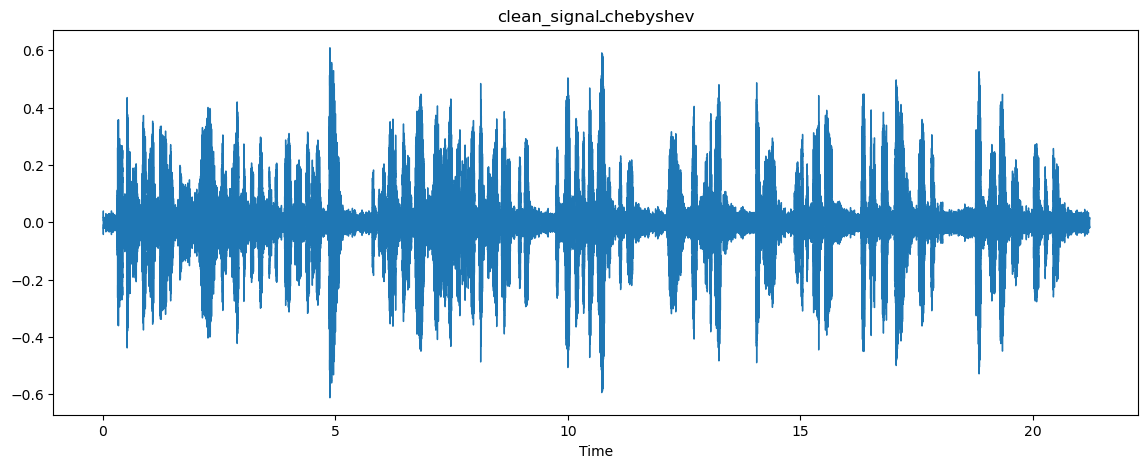

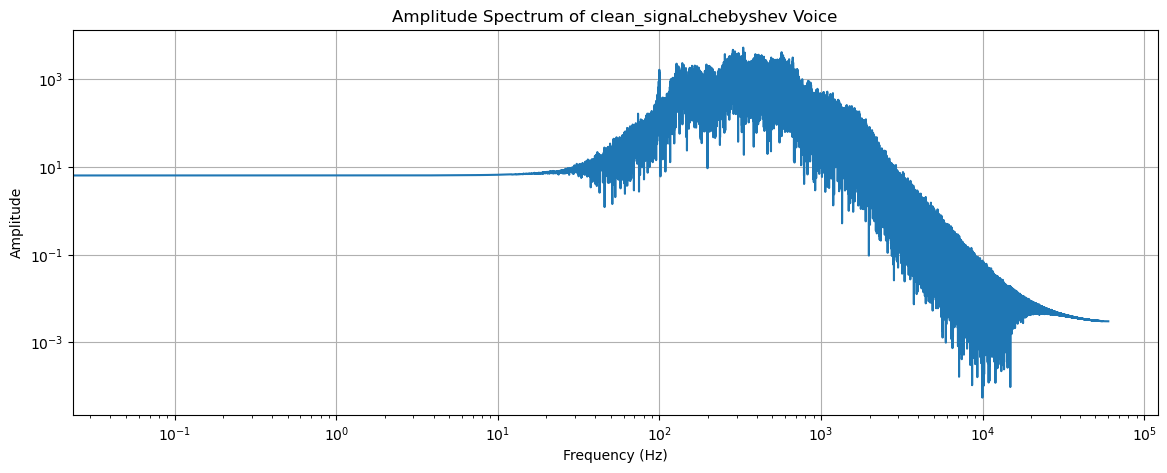

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(clean_signalـchebyshev, sr=new_sr)
plt.title('clean_signalـchebyshev')
plt.show()

fft_result = np.fft.fft(clean_signalـchebyshev)
fft_magnitude = np.abs(fft_result)
fft_frequency = np.fft.fftfreq(len(fft_result), 1/sr)

positive_freq_indices = np.where(fft_frequency >= 0)
fft_frequency = fft_frequency[positive_freq_indices]
fft_magnitude = fft_magnitude[positive_freq_indices]

plt.figure(figsize=(14, 5))
plt.plot(fft_frequency, fft_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of clean_signalـchebyshev Voice')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


In [10]:
clean_signalـbutterworth = apply_butterworth_filter(noisy_signal, sr=new_sr)
sf.write(cleaned_audio_path_butterworth, clean_signalـbutterworth, new_sr)

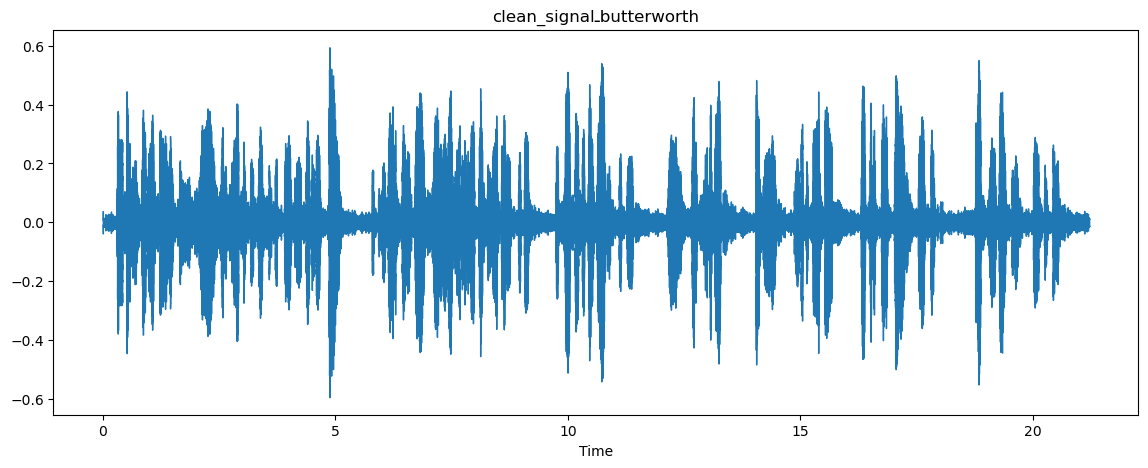

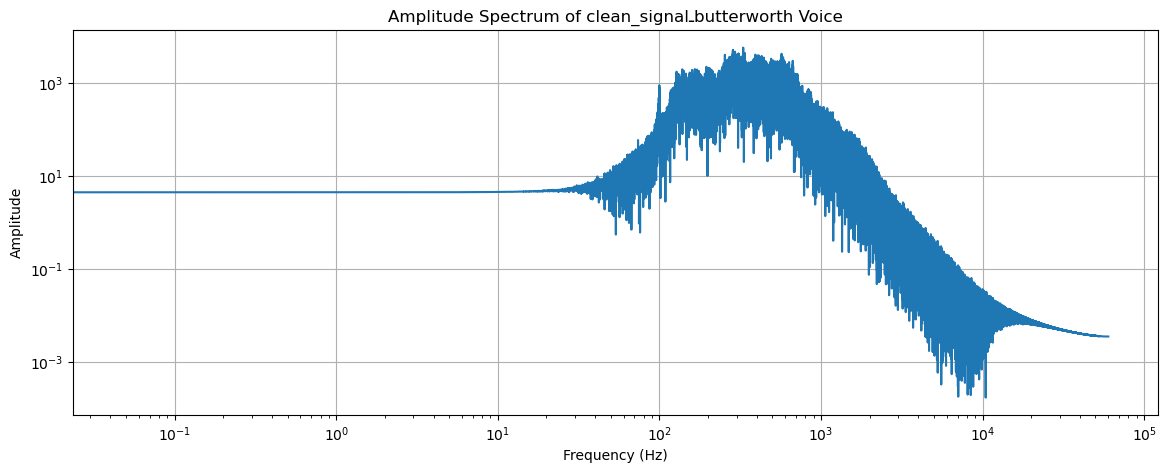

In [11]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(clean_signalـbutterworth, sr=new_sr)
plt.title('clean_signalـbutterworth')
plt.show()

fft_result = np.fft.fft(clean_signalـbutterworth)
fft_magnitude = np.abs(fft_result)
fft_frequency = np.fft.fftfreq(len(fft_result), 1/sr)

positive_freq_indices = np.where(fft_frequency >= 0)
fft_frequency = fft_frequency[positive_freq_indices]
fft_magnitude = fft_magnitude[positive_freq_indices]

plt.figure(figsize=(14, 5))
plt.plot(fft_frequency, fft_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of clean_signalـbutterworth Voice')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


In [14]:
clean_signal, sr = librosa.load(audio_path, sr=None)
clean_signal_resampled= librosa.resample(y, orig_sr=sr, target_sr=new_sr)
noisy_signal, sr = librosa.load(noisy_audio_path, sr=None)
cleaned_signal_chebyshev, sr = librosa.load(cleaned_audio_path_chebyshev, sr=None)
cleaned_signal_butterworth, sr = librosa.load(cleaned_audio_path_butterworth, sr=None)

In [15]:
snr_clean = calculate_snr(clean_signal_resampled, clean_signal_resampled)
snr_before = calculate_snr(clean_signal_resampled, noisy_signal)
snr_after_chebyshev = calculate_snr(clean_signal_resampled, cleaned_signal_chebyshev)
snr_after_butterworth = calculate_snr(clean_signal_resampled, cleaned_signal_butterworth)


print(f"SNR for main signal: {snr_clean:.2f} dB")
print(f"SNR for noisy signal: {snr_before:.2f} dB")
print(f"SNR after denoising with chebyshev: {snr_after_chebyshev:.2f} dB")
print(f"SNR after denoising with butterworth: {snr_after_butterworth:.2f} dB")


SNR for main signal: inf dB
SNR for noisy signal: 4.43 dB
SNR after denoising with chebyshev: 16.06 dB
SNR after denoising with butterworth: 15.55 dB


/var/folders/0c/bqr4l9656h99bbzs1fstzvvr0000gn/T/ipykernel_67825/4148789558.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(np.sum(clean ** 2) / np.sum(noise ** 2))
